<img height="60" width="120" src="https://shwetkm.github.io/upxlogo.png"></img>
# Tensor Flow Classification Assignment Solution

# Kannada-MNIST dataset

### Dataset Description  <a id='insurance'>
    
**Objective**
The objective is to correctly classify the images according to the labels given

The Kannada MNIST dataset consists of 60000 28x28 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Each of the classes are numbers from in 1 to 10 in Kannada language script

<img height="500" width="500" src="https://t3.ftcdn.net/jpg/01/62/22/58/500_F_162225807_ntQwmEkc76NoItsdipA1eNHQZKqdBoio.jpg"></img>

### 1. Importing packages and dataset <a id='packages'>

In [ ]:
#Importing the packages
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib,os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

print(tf.__version__)

In [101]:
# Reading the dataset
kannada = pd.read_csv('Kannada_MNIST.csv')

In [102]:
# Getting the head of the dataset
kannada.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# Getting the shape of the dataset
kannada.shape

(60000, 785)

# 2. Assigning images and labels from the dataset

In [104]:
kannada_images = kannada.drop('label',1)
kannada_labels = kannada['label']

# 3. Visualize the data

In [105]:
# Converting the images to 255 format
kannada_images = kannada_images/255

In [106]:
# Converting the images to 3 dimensional for it to be viewed as before it was in 1 dimension format
kannada_images = kannada_images.values.reshape(60000,28,28)

Label: 9


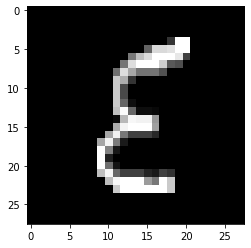

In [108]:
# Displaying the image randomly
import random
import matplotlib.pyplot as plt
i = random.randint(0, 100)
print("Label: %s" % kannada_labels[i])
plt.imshow(kannada_images[i], cmap='gray')

# 5. Reformat the data

In [111]:
# Converting the 3D array to 2D format of shape N(784) as there are 28 by 28 images
TRAINING_SIZE = len(kannada_images)

# Reshape from (N, 32,32,3) to (N, 32*32*3=3072)
kannada_images = np.reshape(kannada_images, (TRAINING_SIZE,784))

# Convert the array to float32 as opposed to uint8
kannada_images = kannada_images.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
kannada_images /= 255


In [112]:
# We are converting the labels from integer format to one hot encoding format
NUM_CAT = 10

print("Before",kannada_labels[0]) # The format of the labels before conversion

kannada_labels  = tf.keras.utils.to_categorical(kannada_labels, NUM_CAT)

print("After",kannada_labels[0]) # The format of the labels after conversion


Before 0
After [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 5. Build the model

In [113]:
# Cast the labels to floats, needed later
kannada_labels = kannada_labels.astype(np.float32)

In [114]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(kannada_images,kannada_labels,random_state=2,test_size=0.3)

In [115]:
# Create a sequential model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(NUM_CAT, activation=tf.nn.softmax))


# Create a Keras version optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# We will now compile and print out a summary of our model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
# Model summary can be created by calling the summary() function on the model that returns a string that in turn can be printed.
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


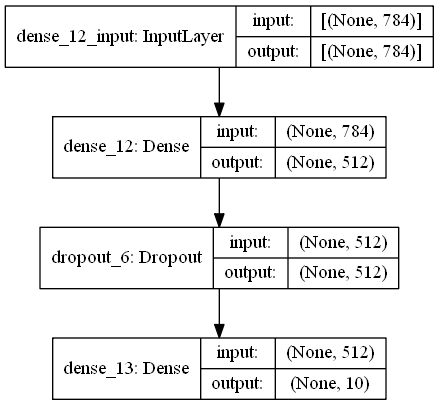

In [116]:
#Plot model summary
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# 6. Save model in a model file

In [117]:
# Model Checkpoint
# HDF5 file format is built for fast I/O processing and storage.
# HDF5 is a self-describing file format, all data and metadata can be passed along in one file.

filepath="weights.Kannada_MNIST.best.hdf5"

# 7. Train the model

In [118]:
#Model checkpoint callback
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [119]:
#Early stopping checkpoint
early_stopping_checkpoint = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [120]:
fitted_model = model.fit(
        X_train,Y_train,
        epochs=10,
        validation_data=(X_test,Y_test),
        callbacks=[checkpoint,early_stopping_checkpoint]
        
        )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
41760/42000 [============================>.] - ETA: 0s - loss: 1.0789 - acc: 0.7824WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


42000/42000 [==============================] - 8s 183us/sample - loss: 1.0749 - acc: 0.7832 - val_loss: 0.3934 - val_acc: 0.9167
Epoch 2/10
41696/42000 [============================>.] - ETA: 0s - loss: 0.3229 - acc: 0.9209WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


42000/42000 [==============================] - 8s 187us/sample - loss: 0.3223 - acc: 0.9210 - val_loss: 0.2274 - val_acc: 0.9412
Epoch 3/10
41760/42000 [============================>.] - ETA: 0s - loss: 0.2253 - acc: 0.9404WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


42000/42000 [==============================] - 8s 188us/sample - loss: 0.2249 - acc: 0.9406 - val_loss: 0.1760 - val_acc: 0.9525
Epoch 4/10
41984/42000 [============================>.] - ETA: 0s - loss: 0.1868 - acc: 0.9493WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


42000/42000 [==============================] - 8s 185us/sample - loss: 0.1868 - acc: 0.9493 - val_loss: 0.1522 - val_acc: 0.9571
Epoch 5/10
41728/42000 [============================>.] - ETA: 0s - loss: 0.1670 - acc: 0.9531WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


42000/42000 [==============================] - 8s 179us/sample - loss: 0.1669 - acc: 0.9531 - val_loss: 0.1390 - val_acc: 0.9607
Epoch 6/10
41664/42000 [============================>.] - ETA: 0s - loss: 0.1512 - acc: 0.9576WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


42000/42000 [==============================] - 8s 180us/sample - loss: 0.1515 - acc: 0.9575 - val_loss: 0.1311 - val_acc: 0.9623
Epoch 7/10
41792/42000 [============================>.] - ETA: 0s - loss: 0.1427 - acc: 0.9596WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


42000/42000 [==============================] - 8s 183us/sample - loss: 0.1424 - acc: 0.9597 - val_loss: 0.1273 - val_acc: 0.9617
Epoch 8/10
41728/42000 [============================>.] - ETA: 0s - loss: 0.1342 - acc: 0.9613WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


42000/42000 [==============================] - 8s 186us/sample - loss: 0.1339 - acc: 0.9614 - val_loss: 0.1155 - val_acc: 0.9664
Epoch 9/10
41728/42000 [============================>.] - ETA: 0s - loss: 0.1277 - acc: 0.9645WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


42000/42000 [==============================] - 8s 187us/sample - loss: 0.1275 - acc: 0.9645 - val_loss: 0.1120 - val_acc: 0.9664
Epoch 10/10
41632/42000 [============================>.] - ETA: 0s - loss: 0.1207 - acc: 0.9653WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


42000/42000 [==============================] - 8s 191us/sample - loss: 0.1208 - acc: 0.9653 - val_loss: 0.1080 - val_acc: 0.9674


# 8.Test the model

In [121]:
def predict_image(model,img):
  
  classifier=model
  plt.imshow(img.reshape(28,28), cmap='gray')
  x=img.reshape(1,784) 
  result = classifier.predict(x)
  print(np.argmax(result))

4


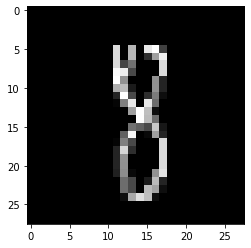

In [122]:
predict_image(model,X_test[11])